Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from metrics import print_evaluation_metrics

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date"
target_column = "Close"
df = pd.read_csv(file_path, parse_dates=True)

df.set_index(date_column, inplace=True)

dates = df.index.values
df = df.select_dtypes(exclude=["object"])

Train test split

In [3]:
data_length = len(df)
train_split = 0.9
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Create the model

In [4]:
model = LinearRegression().fit(
    train.drop(columns=[target_column]), train[target_column]
)

pred = model.predict(test.drop(columns=[target_column]))
pred

array([23158.24354722, 23507.93090471, 23484.35067293, 23140.11586064,
       23618.91505999, 23471.54151398, 22391.15452309, 22348.78294797,
       22398.39081537, 22397.22711198, 22199.78673134, 21702.1083897 ,
       20388.99593063, 20167.54407   , 20569.37580487, 22061.46469024,
       24115.30364294, 24744.68957416, 24473.94425159, 25135.7036602 ,
       27430.959395  , 27033.76889381, 28073.5380763 , 27835.43006184,
       28210.66851036, 27395.47058542, 28296.15293474, 27522.59307439,
       27471.70837964, 27980.03524247, 27121.05997927, 27269.54950639,
       28287.0913391 , 28016.24729767, 28476.43452003, 28411.92138898,
       28209.85039675, 27819.66381386, 28136.41736326, 28159.94630583,
       28024.15709778, 27916.41011928, 27927.73371841, 28311.78015555,
       29600.42917868, 30213.80922779, 30165.46945219, 30436.79742231,
       30514.47981069, 30348.53189945, 30320.47300654, 29453.43413743,
       30354.77285676, 28834.35587802, 28227.7947842 , 27271.49419756,
      

Plot the result

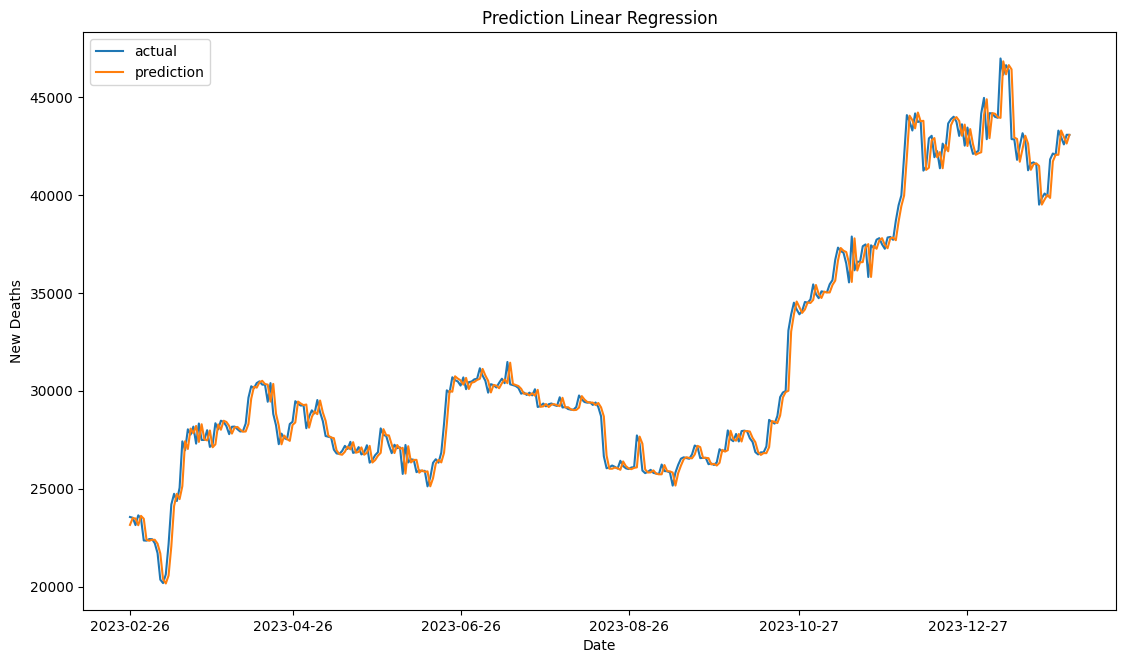

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], pred, label="prediction")
ax.set_title("Prediction Linear Regression")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

RMSE of the result

In [6]:
print_evaluation_metrics(pred, test[target_column].values)

Evaluation Metrics:
MSE: 546789.02
RMSE: 739.45
MAE: 483.71
MAPE: 1.52
SMAPE: 1.53
